In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('classification_train.csv')

In [3]:
df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3231 non-null   int64  
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   float64
 12  type                  3231 non-null   object 
 13  quality               3231 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.5+ KB


In [5]:
df.type.value_counts()

white    2453
red       778
Name: type, dtype: int64

In [6]:
df.quality.value_counts()

6    1418
5    1069
7     539
4     108
8      97
Name: quality, dtype: int64

In [7]:
import seaborn as sns

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

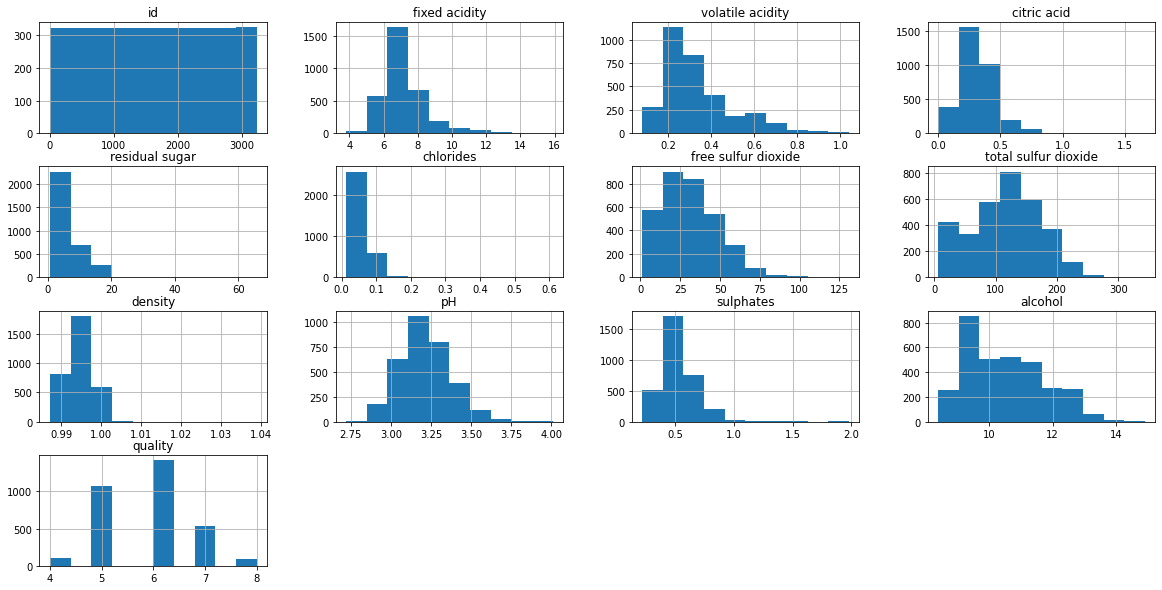

In [8]:
df.hist(figsize = (20, 10))

In [9]:
numeric_col = [col for col in df if df[col].dtype != "object" ]
object_col = [col for col in df if df[col].dtype == "object" ]

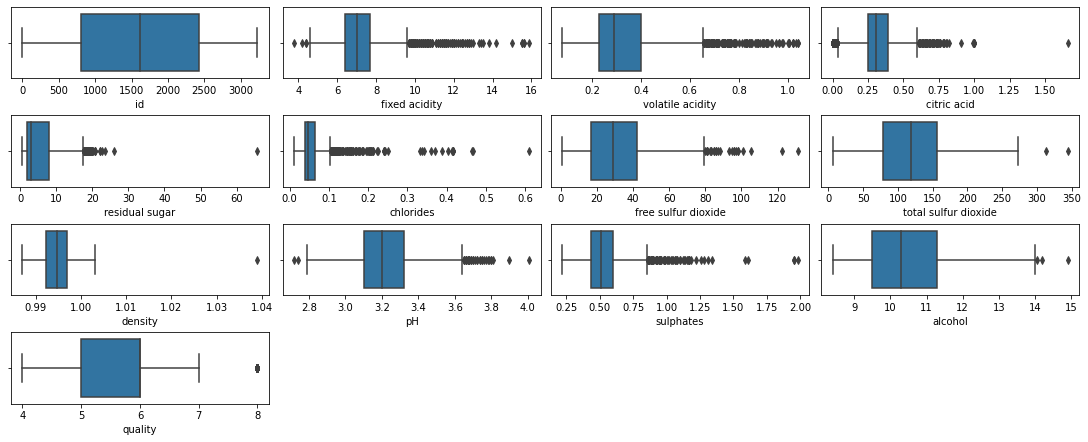

In [10]:
plt.figure( figsize=(15,10),
            constrained_layout = True )

for i in range(len(numeric_col)):
    plt.subplot( 8, 4, i+1 )
    sns.boxplot( df[numeric_col[i]] )

- id : 식별 고유값
- fixed acidity : 고정(비휘발성) 산도: 와인과 관련된 대부분의 산
- volatile acidity : 휘발성 산도: 와인에 함유된 아세트산의 양. 너무 높으면 불쾌한 식초 맛이 날 수 있음
- citric acid : 구연산: 소량으로 발견되며, 와인에 풍미를 더할 수 있음
- residual sugar : 잔여 당분: 발효가 멈춘 후 남은 설탕의 양으로 1g/L 미만의 와인은 드물며 45g/L 이상의 와인은 단맛으로 간주함
- chlorides : 염소화물: 와인의 염분량
- free sulfur dioxide : 유리 이산화황: 미생물의 성장과 와인의 산화를 방지함
- total sulfur dioxide : 총 이산화황: 저농도에서는 대부분 맛이 나지 않으나 50ppm 이상의 농도에서 맛에서 뚜렷하게 나타남
- density : 밀도: 알코올 및 당 함량에 따라 변함
- pH : 산성 또는 염기성 정도. 0(매우 산성) ~ 14(매우 염기성). 대부분의 와인은 pH 3-4 사이임
- sulphates : 황산염: 이산화황 농도에 기여할 수 있는 와인 첨가제. 항균 및 항산화제로 작용
- alcohol : 와인의 알코올 함량 백분율
- type : 와인에 사용된 포도의 종류. Red(적포도주), White(백포도주)로 나뉨
- quality : 맛으로 평가된 와인의 품질


In [11]:
df.describe(percentiles = [0.01,  0.25, 0.5, 0.75, 0.95, 0.99])

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000
mean,1616.000000,7.205772,0.336072,0.319496,5.454813,0.055890,30.583720,116.256577,0.994667,3.214166,0.531455,10.497108,5.829155
std,932.853686,1.295494,0.160285,0.145854,4.816098,0.035722,17.387143,55.759070,0.003054,0.161873,0.149686,1.193813,0.850003
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.400000,4.000000
1%,33.300000,5.100000,0.126500,0.000000,0.900000,0.020300,4.000000,11.000000,0.988906,2.890000,0.300000,8.700000,4.000000
25%,808.500000,6.400000,0.227500,0.250000,1.800000,0.038000,17.000000,78.000000,0.992205,3.100000,0.430000,9.500000,5.000000
50%,1616.000000,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,119.000000,0.994840,3.200000,0.510000,10.300000,6.000000
75%,2423.500000,7.700000,0.400000,0.390000,8.100000,0.064000,42.000000,156.000000,0.996900,3.320000,0.600000,11.300000,6.000000
95%,3069.500000,9.800000,0.662500,0.560000,15.250000,0.102000,61.000000,205.000000,0.999370,3.490000,0.780000,12.700000,7.000000
99%,3198.700000,11.900000,0.868500,0.740000,18.200000,0.191600,76.700000,234.350000,1.000600,3.647000,0.997000,13.400000,8.000000


In [12]:
def get_outlier(data, col_name, li):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    q1, q3 = np.percentile(data[col_name], [25, 75])
    iqr = q3-q1
    lowest_val = q1 - iqr*1.5
    highest_val = q3 + iqr*1.5

    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = data[col_name][(data[col_name] < lowest_val) | (data[col_name] > highest_val)].index
    print(col_name, len(outlier_index))
    li.extend(outlier_index)

    return li

li = []
for out in numeric_col:
    get_outlier(df, out, li)

id 0
fixed acidity 175
volatile acidity 177
citric acid 248
residual sugar 65
chlorides 154
free sulfur dioxide 25
total sulfur dioxide 2
density 1
pH 35
sulphates 87
alcohol 3
quality 97


In [13]:
print(len(li), len(set(li)), df.shape[0])

1069 796 3231


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
lab = LabelEncoder()
lab.fit(df['type'])
df['type'] = lab.transform(df['type'])

In [17]:
df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,1,6
1,2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,1,7
2,3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,1,6
3,4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,1,5
4,5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,0,7


In [33]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [24]:
test_df = pd.read_csv('classification_test.csv')

In [25]:
test_df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1,7.3,0.31,0.25,6.65,0.032,30.0,138.0,0.99244,2.90,0.37,11.1,white
1,2,8.7,0.70,0.24,2.50,0.226,5.0,15.0,0.99910,3.32,0.60,9.0,red
2,3,6.9,0.63,0.01,2.40,0.076,14.0,39.0,0.99522,3.34,0.53,10.8,red
3,4,6.3,0.23,0.50,10.40,0.043,61.0,132.0,0.99542,2.86,0.46,9.1,white
4,5,6.9,0.54,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,red


In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3231 non-null   int64  
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   float64
 12  type                  3231 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 328.3+ KB


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

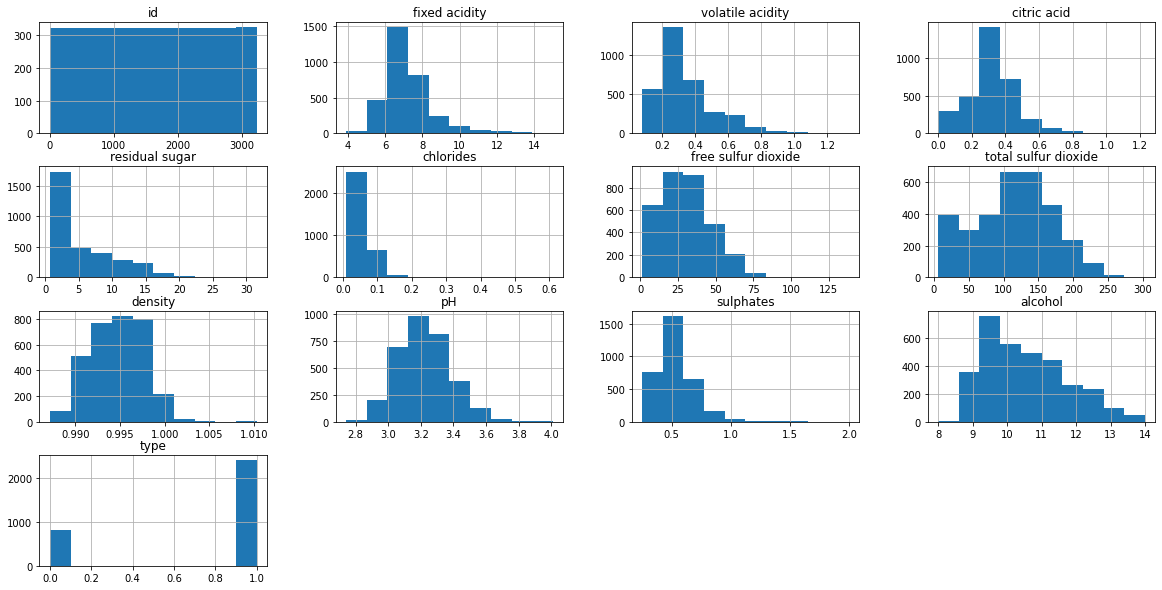

In [32]:
test_df.hist(figsize = (20, 10))

In [27]:
lab = LabelEncoder()
lab.fit(test_df['type'])
test_df['type'] = lab.transform(test_df['type'])

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [21]:
kf = KFold(random_state = 0,
          n_splits = 10,
          shuffle = True)
xgb_param_grid ={
    'max_depth' : [3,4,5,6] , 
    'n_estimators': [10, 50, 100, 200], 
    'learning_rate':[0.01, 0.05, 0.1], 
    'gamma': [0.5, 1, 2]
}

In [35]:
xgb = XGBClassifier()
xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv = kf, n_jobs = -1, verbose = 2)
xgb_grid_search.fit(X, y)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0.5, 1, 2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [36]:
pred = xgb_grid_search.best_estimator_.predict(test_df.iloc[:,1:])

In [37]:
submission = pd.read_csv('sample_submission.csv')
submission['quality'] = pred
submission

,id,quality
0,1,6
1,2,6
2,3,6
3,4,6
4,5,6
...,...,...
3226,3227,5
3227,3228,6
3228,3229,5
3229,3230,7


In [38]:
submission.to_csv("submission.csv", index=False)